# Importing python libraries

In [1]:
# importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing dataset

In [2]:
#importing train and test data
disease=pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv')
testdisease=pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Testing.csv')

# Exploratory Data Analysis

In [3]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
testdisease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [5]:
# number of rows and columns in train and test dataset
size=disease.shape,testdisease.shape
print('Size of train data=',size[0])
print('Size of test data=',size[1])

Size of train data= (4920, 134)
Size of test data= (42, 133)


In [6]:
# checking if any column has Null values
disease.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [7]:
# dropping the nwanted columns
disease=disease.drop(columns=['Unnamed: 133'])

In [8]:
disease.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [9]:
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [10]:
'''creating 2 lists, one which stores the number of patients having a particular disease, 
and one storing the name of disease'''
count={} #dictionary storing name of disease and their counts
for i in disease['prognosis']:
    count[i]=0
for i in disease['prognosis']:
    count[i]+=1
cnt=[] #list of number of patients
for i in count:
    cnt.append(count[i])
labels=[] # list of diseases
for i in disease['prognosis']:
    if i not in labels:
        labels.append(i)
cnt,labels

([120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120],
 ['Fungal infection',
  'Allergy',
  'GERD',
  'Chronic cholestasis',
  'Drug Reaction',
  'Peptic ulcer diseae',
  'AIDS',
  'Diabetes ',
  'Gastroenteritis',
  'Bronchial Asthma',
  'Hypertension ',
  'Migraine',
  'Cervical spondylosis',
  'Paralysis (brain hemorrhage)',
  'Jaundice',
  'Malaria',
  'Chicken pox',
  'Dengue',
  'Typhoid',
  'hepatitis A',
  'Hepatitis B',
  'Hepatitis C',
  'Hepatitis D',
  'Hepatitis E',
  'Alcoholic hepatitis',
  'Tuberculosis',
  'Common Cold',
  'Pneumonia',
  'Dimorphic hemmorhoids(piles)',
  'Heart attack',
  'Varicose veins',
  'Hypothyroidism',
  'Hyperthyroidism',
  'Hypoglycemia',
  'Osteoarthristis',
  'Arthritis',
  '(vertigo) Paroymsal  Positional Vertig

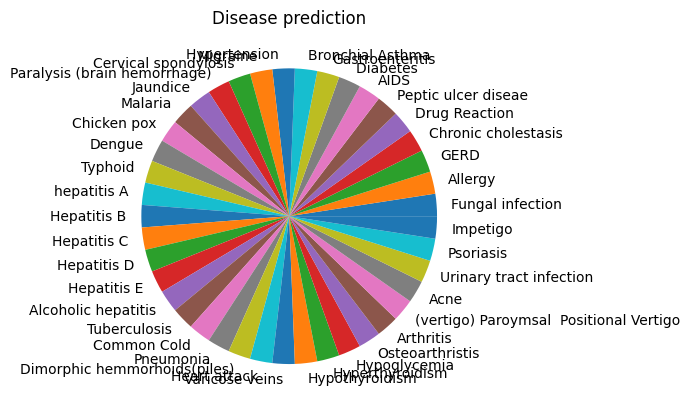

In [11]:
# pie chart representation of disease with respective number of patients infected
fig, ax = plt.subplots()
ax.pie(cnt,labels=labels)
plt.title('Disease prediction')
plt.show()

In [12]:
col=np.array(disease.columns)

In [13]:
# converting categorical data to numerical data
le=LabelEncoder()
disease['prognosis']=le.fit_transform(disease['prognosis'])
le=LabelEncoder()
testdisease['prognosis']=le.fit_transform(testdisease['prognosis'])

In [14]:
# correlation matrix
disease[col].corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.151898
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,-0.146564
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.063307
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.237346
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.202584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720,0.195249
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120,0.091116
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120,0.091116
yellow_crust_ooze,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,0.946120,1.000000,0.091116


<Axes: >

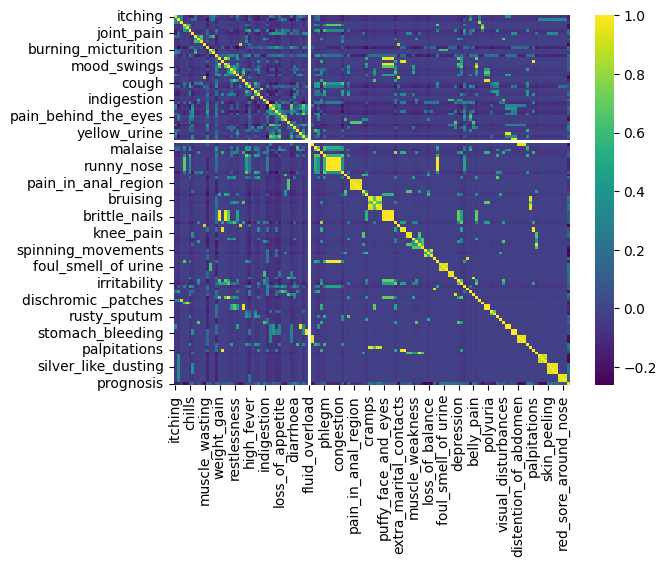

In [15]:
#heatmap
sns.heatmap(disease[col].corr(),cmap='viridis')

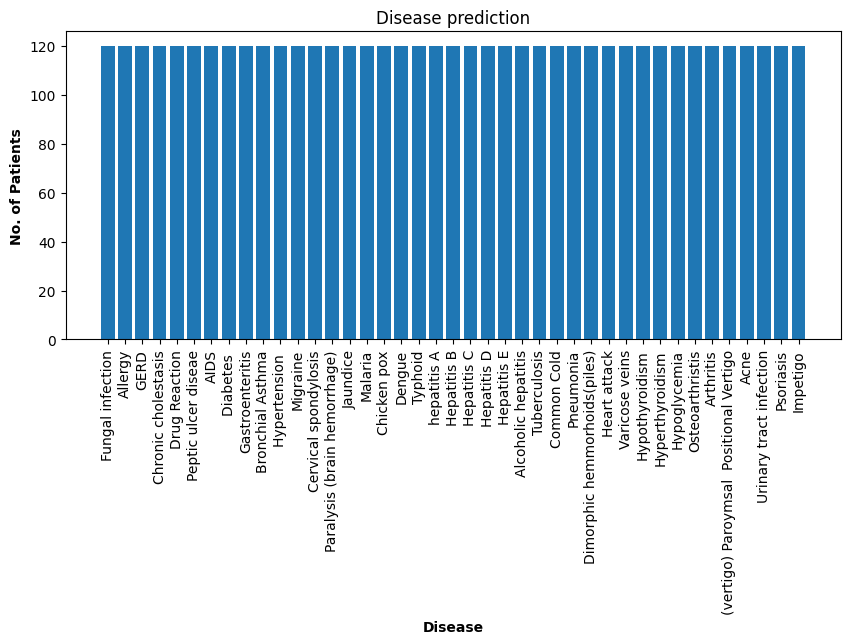

In [16]:
#countplot
plt.figure(figsize=(10,4))
plt.bar(labels,cnt)
plt.xticks(rotation=90)
plt.xlabel('Disease',fontweight='bold')
plt.ylabel('No. of Patients',fontweight='bold')
plt.title('Disease prediction')
plt.show()

# Train and test data

In [17]:
x_train=disease.drop(columns=['prognosis'])
y_train=disease['prognosis']

In [18]:
x_test=testdisease.drop('prognosis',axis=1)
y_test=testdisease['prognosis']

# Model Training and Fitting

In [19]:
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

In [20]:
print('accuracy=',rf_model.score(x_test,y_test))

accuracy= 0.9761904761904762


In [21]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=8)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [22]:
print('accuracy=',dt_model.score(x_test,y_test))

accuracy= 0.9761904761904762


In [23]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [24]:
print('accuracy=',lr_model.score(x_test,y_test))

accuracy= 1.0


In [25]:
nb_model=MultinomialNB()
nb_model.fit(x_train,y_train)

MultinomialNB()

In [26]:
print('accuracy=',nb_model.score(x_test,y_test))

accuracy= 1.0


In [27]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
print('accuracy=',knn_model.score(x_test,y_test))

accuracy= 1.0


In [29]:
gbdt_model=GradientBoostingClassifier(n_estimators=10,max_depth=3)
gbdt_model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [30]:
print('accuracy=',gbdt_model.score(x_test,y_test))

accuracy= 0.9761904761904762
